## OPENCV FEATURE DESCRIPTORS  ORB -- SIFT -- SURF

### ORB Feature Descriptors and  Matching

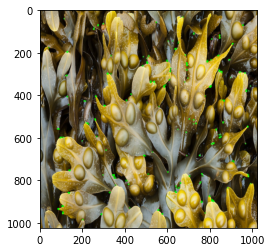

In [40]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('images/Resized_original_1024/Fucus_16.jpg')
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img1,None)
# compute the descriptors with ORB
kp, des = orb.compute(img1, kp)
# draw only keypoints location,not size and orientation
img1 = cv2.drawKeypoints(img1, kp, None, color=(0,255,0), flags=0)

plt.imshow(cv2.cvtColor(img1, cv2.COLOR_RGB2BGR))

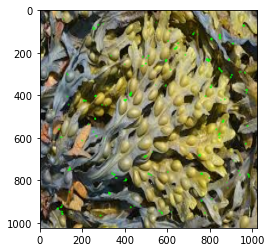

In [3]:
img2 = cv2.imread('images/Resized_original_1024/Fucus_27.jpg')
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img1,None)
# compute the descriptors with ORB
kp, des = orb.compute(img2, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img2, kp, None, color=(0,255,0), flags=0)

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

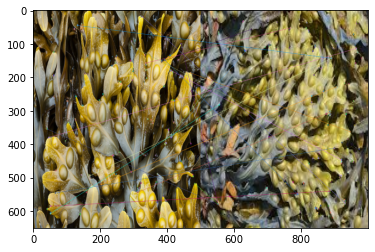

In [5]:
import numpy as np
import cv2
       
query_img = cv2.imread('images/Resized_original_1024/Fucus_16.jpg')
train_img = cv2.imread('images/Resized_original_1024/Fucus_27.jpg')
  
query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
  
orb = cv2.ORB_create()
  
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None)
 
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)
  

final_img = cv2.drawMatches(query_img, queryKeypoints,
train_img, trainKeypoints, matches[:20],None)
  
final_img = cv2.resize(final_img, (1000,650))

cv2.imwrite("feature_matching_ORB.jpg",final_img)

plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_RGB2BGR))

### SIFT Feature Descriptors and  Matching

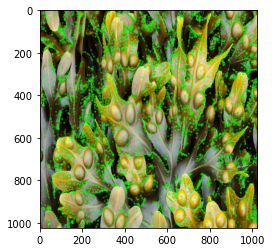

In [44]:
img1 = cv2.imread('images/Resized_original_1024/Fucus_16.jpg')
# Initiate ORB detector
sift = cv2.SIFT_create()
# find the keypoints with ORB
kp = sift.detect(img1,None)
# compute the descriptors with ORB
kp, des = sift.compute(img1, kp)
# draw only keypoints location,not size and orientation
img1 = cv2.drawKeypoints(img1, kp, None, color=(0,255,0), flags=0)

plt.imshow(cv2.cvtColor(img1, cv2.COLOR_RGB2BGR))

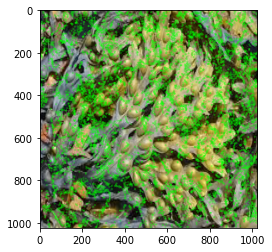

In [7]:
img2 = cv2.imread('images/Resized_original_1024/Fucus_27.jpg')
# Initiate ORB detector
sift = cv2.SIFT_create()
# find the keypoints with ORB
kp = sift.detect(img1,None)
# compute the descriptors with ORB
kp, des = sift.compute(img2, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img2, kp, None, color=(0,255,0), flags=0)

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

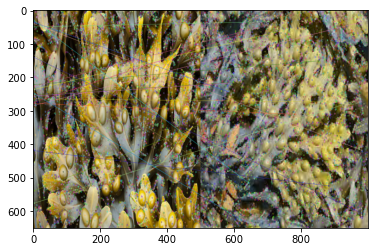

In [8]:
query_img = cv2.imread('images/Resized_original_1024/Fucus_16.jpg')
train_img = cv2.imread('images/Resized_original_1024/Fucus_27.jpg')
  
query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
  
sift = cv2.SIFT_create()
  
queryKeypoints, queryDescriptors = sift.detectAndCompute(query_img_bw,None)
trainKeypoints, trainDescriptors = sift.detectAndCompute(train_img_bw,None)
 
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)
  

final_img = cv2.drawMatches(query_img, queryKeypoints,
train_img, trainKeypoints, matches[:20],None)
  
final_img = cv2.resize(final_img, (1000,650))

cv2.imwrite("feature_matching_SIFT.jpg",final_img)

plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_RGB2BGR))

### FAST Feature Descriptors

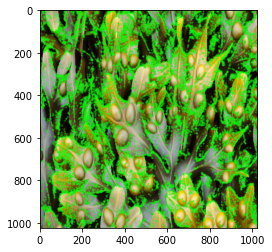

In [14]:
img1 = cv2.imread('images/Resized_original_1024/Fucus_16.jpg')
# Initiate ORB detector
fast = cv2.FastFeatureDetector_create()
# find the keypoints with ORB
kp = fast.detect(img1,None)
# compute the descriptors with ORB
kp, des = sift.compute(img1, kp)
# draw only keypoints location,not size and orientation
img1 = cv2.drawKeypoints(img1, kp, None, color=(0,255,0), flags=0)

plt.imshow(cv2.cvtColor(img1, cv2.COLOR_RGB2BGR))

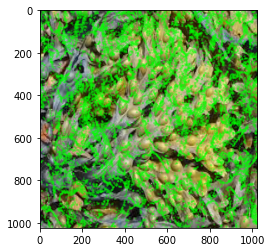

In [13]:
img2 = cv2.imread('images/Resized_original_1024/Fucus_27.jpg')
# Initiate ORB detector
fast = cv2.FastFeatureDetector_create()
# find the keypoints with ORB
kp = fast.detect(img1,None)
# compute the descriptors with ORB
#kp, des = sift.compute(img2, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img2, kp, None, color=(0,255,0), flags=0)

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

In [78]:
import os

import json
   

data_list = os.listdir("Annotations_original_1024")

for data in data_list:
    path = "images/Resized_original_1024/" + data.split(".")[0] + ".jpg"
    img = cv2.imread(path)
    
    sift = cv2.FastFeatureDetector_create()
    # find the keypoints with ORB
    kp = sift.detect(img,None)
    
    f = open('Annotations_original_1024/'+data)
    data__ = json.load(f)
    
    K=[]
    for keypoint in kp:
        K.append([keypoint.pt[0],keypoint.pt[1]])
    
    data__["shapes"][0]["points"]=K
    
    out_file = open("FAST_features/" + data, "w")
  
    json.dump(data__, out_file)
  
    out_file.close()
    

In [129]:
import utils
from models import pixelacc

label = utils.get_label_png("Segmentations/"+ "SegmentationClassPNG/" + "Fucus_1"+'.png')
orb_label = utils.get_label_png("SIFT_features/"+"Segmentations/" +"Fucus_1" + '.png')

In [130]:
m = tf.keras.metrics.MeanIoU(num_classes=5)
m.update_state(label,orb_label)
m.result().numpy()

0.3436274

In [124]:
float(pixelacc(label,orb_label))

0.3233785629272461

In [131]:
data_list = os.listdir("Annotations_original_1024")

m = tf.keras.metrics.MeanIoU(num_classes=5)
#m.update_state(label,orb_label)
#m.result().numpy()

orb_pix = []
sift_pix = []
fast_pix = []

orb_mean = []
sift_mean = []
fast_mean = []

for data in data_list:
    path_gt = "Segmentations/SegmentationClassPNG/" + data.split(".")[0] + ".png"
    path_orb = "ORB_features/Segmantations/" + data.split(".")[0] + ".png"
    path_sift = "SIFT_features/Segmentations/" + data.split(".")[0] + ".png"
    path_fast = "FAST_features/Segmentations/" + data.split(".")[0] + ".png"
    
    label = utils.get_label_png(path_gt)
    orb_label = utils.get_label_png(path_orb)
    sift_label = utils.get_label_png(path_sift)
    fast_label = utils.get_label_png(path_fast)
    
    #orb_pix.append(float(pixelacc(label,orb_label)))
    #sift_pix.append(float(pixelacc(label,sift_label)))
    #fast_pix.append(float(pixelacc(label,fast_label)))
    m.update_state(label,orb_label)
    orb_mean.append(m.result().numpy())
    m.update_state(label,sift_label)
    sift_mean.append(m.result().numpy())
    m.update_state(label,fast_label)
    fast_mean.append(m.result().numpy())
    

In [93]:
np.mean(fast_pix)

0.3886063045925564

In [139]:
np.mean(orb_mean)

0.42444086

In [140]:
np.mean(sift_mean)

0.42492646

In [132]:
np.mean(orb_mean)

0.42444086

In [133]:
np.mean(sift_mean)

0.42492646

In [134]:
np.mean(fast_mean)

0.42541698

In [57]:
import tensorflow as tf

In [74]:
from sklearn.metrics import confusion_matrix  
import numpy as np

def compute_iou(y_pred, y_true):
    # ytrue, ypred is a flatten vector
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
     # compute mean iou
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    union = ground_truth_set + predicted_set - intersection
    IoU = intersection / union.astype(np.float32)
    return np.mean(IoU)

In [77]:
compute_iou(label,orb_label)

0.46743044420459634

In [73]:
update_state(label,orb_label)

<tf.Tensor: shape=(4, 4), dtype=uint8, numpy=
array([[143,   0,   0,   0],
       [113,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]], dtype=uint8)>